In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
plt.style.use('ggplot')

In [14]:
from import_data import import_diabetes
df = import_diabetes()
df

Diagnosed Diabetes Percentage  \
State   County                                      
alabama autauga                               9.5   
        baldwin                               8.4   
        barbour                              13.5   
        bibb                                 10.2   
        blount                               10.5   
...                                           ...   
wyoming sweetwater                            7.8   
        teton                                 3.8   
        uinta                                 8.4   
        washakie                              7.4   
        weston                                7.6   

                    Newly Diagnosed Diabetes Rate per 1000  \
State   County                                               
alabama autauga                                        6.6   
        baldwin                                        5.5   
        barbour                                       10.1   
        bibb                                           7.6   
        blount                                         7.5   
...                                                    ...   
wyoming sweetwater                                     5.2   
        teton                                          2.5   
        uinta                                          5.9   
        washakie                                       5.2   
        weston                                         5.2   

                    Obesity Percentage  Physical Inactivity Percentage  \
State   County                                                           
alabama autauga                   29.6                            23.8   
        baldwin                   28.3                            22.0   
        barbour                   29.3                            23.2   
        bibb                      23.1                            23.0   
        blount                    27.8                            24.7   
...                                ...                             ...   
wyoming sweetwater                31.0                            23.2   
        teton                     10.5                            10.7   
        uinta                     33.2                            23.1   
        washakie                  25.4                            20.2   
        weston                    32.0                            21.8   

                    SUMLEV  STATE  COUNTY  YEAR  AGEGRP  TOT_POP  ...  \
State   County                                                    ...   
alabama autauga         50      1       1    11       0    55533  ...   
        baldwin         50      1       3    11       0   217855  ...   
        barbour         50      1       5    11       0    24872  ...   
        bibb            50      1       7    11       0    22367  ...   
        blount          50      1       9    11       0    57771  ...   
...                    ...    ...     ...   ...     ...      ...  ...   
wyoming sweetwater      50     56      37    11       0    42858  ...   
        teton           50     56      39    11       0    23269  ...   
        uinta           50     56      41    11       0    20292  ...   
        washakie        50     56      43    11       0     7877  ...   
        weston          50     56      45    11       0     6924  ...   

                    F_CROWD  F_NOVEH  F_GROUPQ  F_THEME4  F_TOTAL  E_UNINSUR  \
State   County                                                                 
alabama autauga           0        0         0         0        0       3875   
        baldwin           0        0         0         1        1      20864   
        barbour           0        0         1         2        8       2558   
        bibb              0        0         1         2        2       1619   
        blount            0        0         0         0        0       6303   
...                     ...      ...       ...    

In [15]:
df['PCT_MALE'] = round(df['TOT_MALE']/df['TOT_POP']*100,2)
df['PCT_FEMALE'] = round(df['TOT_FEMALE']/df['TOT_POP']*100,2)

south = ['Alabama', 'Arkansas', 'Florida', 
            'Georgia', 'Kentucky', 'Louisiana', 
            'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina',
            'Tennessee', 'Texas', 'Virginia' ,'West Virginia']

northeast = ['connecticut','maine','massachusetts',
      'new hampshire','new jersey','new york',
      'maryland','delaware',
      'pennsylvania','rhode island','vermont','district of columbia']

midwest = ['michigan','ohio','wisconsin','minnesota','illinois','indiana',
      'iowa','missouri','north dakota','south dakota','nebraska','kansas']

west = ['arizona','colorado','utah','nevada','new mexico','idaho','montana','wyoming',
     'california','washington','oregon','hawaii','alaska']
south = list(map(lambda x: x.lower(),south))

for region,string in zip([south, northeast,midwest,west],['south', 'northeast','midwest','west']):
    df[f'in_{string}'] = 0
    df.loc[region,f'in_{string}'] = 1
    
    
keep_columns_lst = (['Diagnosed Diabetes Percentage',
                     'Obesity Percentage','Physical Inactivity Percentage',
                     'TOT_POP','PCT_MALE','PCT_FEMALE',
                     'EP_POV','EP_UNEMP','EP_UNINSUR','E_PCI',
                     'EP_NOHSDP','EP_AGE65','EP_AGE17',
                     'EP_SNGPNT','EP_MOBILE',
                     'EP_NOVEH','NHWA_PCT','NHBA_PCT','NHAA_PCT','H_PCT','NHNA_PCT','NHIA_PCT',
                     'in_south','in_northeast','in_midwest','in_west'
                     ])

fdf = df[keep_columns_lst].copy()

In [16]:
fdf

Diagnosed Diabetes Percentage  Obesity Percentage  \
State   County                                                          
alabama autauga                               9.5                29.6   
        baldwin                               8.4                28.3   
        barbour                              13.5                29.3   
        bibb                                 10.2                23.1   
        blount                               10.5                27.8   
...                                           ...                 ...   
wyoming sweetwater                            7.8                31.0   
        teton                                 3.8                10.5   
        uinta                                 8.4                33.2   
        washakie                              7.4                25.4   
        weston                                7.6                32.0   

                    Physical Inactivity Percentage  TOT_POP  PCT_MALE  \
State   County                                                          
alabama autauga                               23.8    55533     48.63   
        baldwin                               22.0   217855     48.52   
        barbour                               23.2    24872     52.86   
        bibb                                  23.0    22367     53.20   
        blount                                24.7    57771     49.22   
...                                            ...      ...       ...   
wyoming sweetwater                            23.2    42858     51.46   
        teton                                 10.7    23269     51.67   
        uinta                                 23.1    20292     50.76   
        washakie                              20.2     7877     50.58   
        weston                                21.8     6924     52.38   

                    PCT_FEMALE  EP_POV  EP_UNEMP  EP_UNINSUR  E_PCI  ...  \
State   County                                                       ...   
alabama autauga          51.37    15.4       4.2         7.1  29372  ...   
        baldwin          51.48    10.6       4.4        10.2  31203  ...   
        barbour          47.14    28.9       9.5        11.2  18461  ...   
        bibb             46.80    14.0       7.5         7.9  20199  ...   
        blount           50.78    14.4       4.1        11.0  22656  ...   
...                        ...     ...       ...         ...    ...  ...   
wyoming sweetwater       48.54    12.0       5.2        12.0  32624  ...   
        teton            48.33     7.1       1.4        10.0  53703  ...   
        uinta            49.24    12.5       6.1        12.2  27009  ...   
        washakie         49.42    12.4       6.2        15.4  27556  ...   
        weston           47.62    17.4       3.5        13.3  29152  ...   

                    NHWA_PCT  NHBA_PCT  NHAA_PCT  H_PCT  NHNA_PCT  NHIA_PCT  \
State   County                                                                
alabama autauga        74.38     19.33      1.17   2.92      0.08      0.44   
        baldwin        83.23      8.77      1.04   4.65      0.05      0.66   
        barbour        45.57     48.04      0.45   4.33      0.11      0.34   
        bibb           74.67     21.03      0.19   2.67      0.03      0.38   
        blount         87.02      1.43      0.27   9.46      0.04      0.52   
...                      ...       ...       ...    ...       ...       ...   
wyoming sweetwater     79.52      1.15      0.87  15.88      0.12      0.83   
        teton          81.18      0.59      1.55  15.04      0.09      0.31   
        uinta          87.52      0.62      0.43   9.15      0.13      0.66   
        washakie       82.38      0.47      0.71  14.08      0.00      0.69   
        weston         90.48      0.64      1.53   3.94      0.01      1.50   

                    in_south  in_northeast  in_midwest  in_west  
State   County                       

In [17]:
# Ideas - 
# Plot all variables against Diagnosed Diabetes Percentage to look for strong candidates for model
# PCA to see how counties cluster, then color the markers according to diabetes percentage
# This will be interesting but maybe not that illuminating


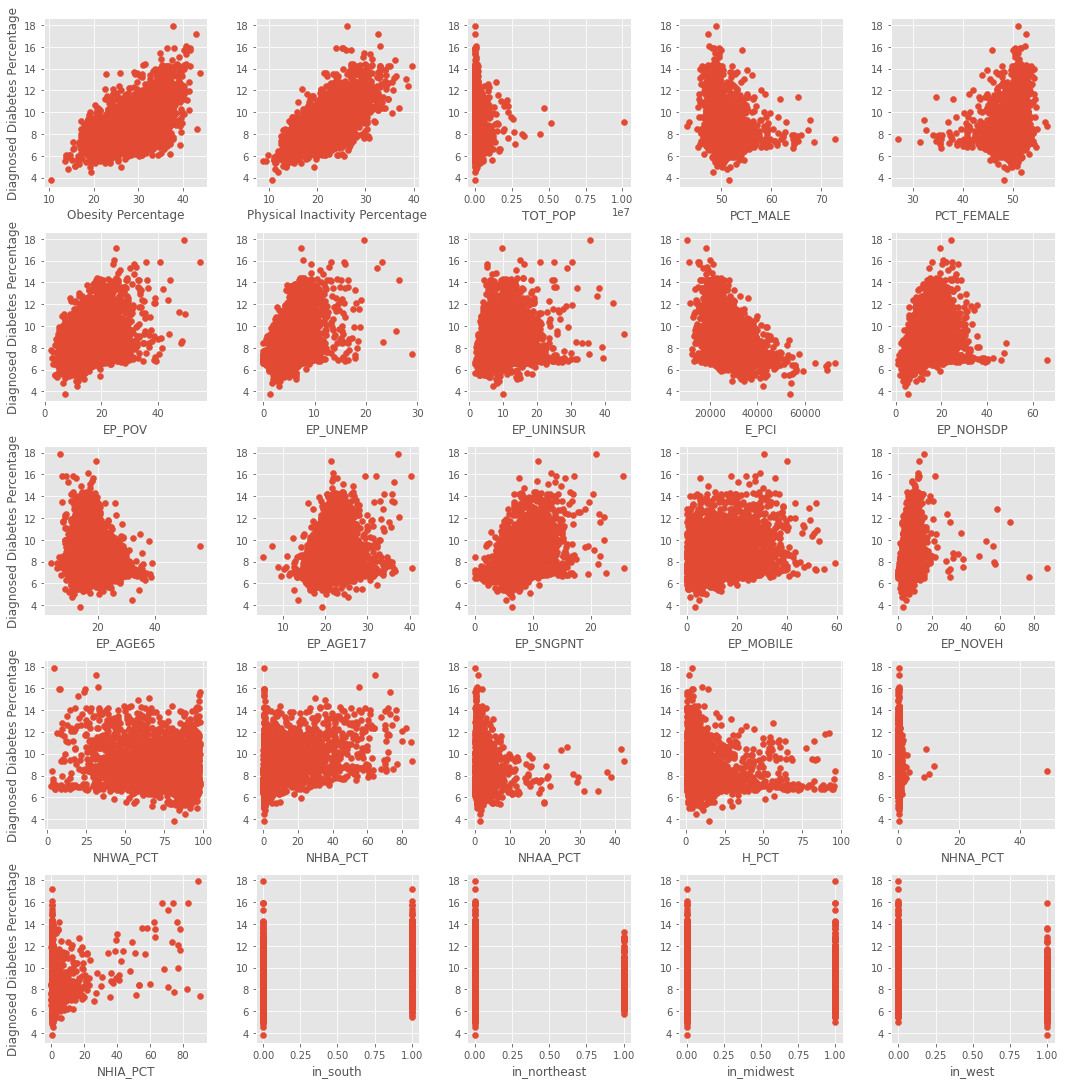

In [20]:
fig, ax = plt.subplots(5,5, figsize = (15,15))
# ax[4][4].hist(fdf['Diagnosed Diabetes Percentage'])
# ax[4][4].set_xlabel('Diagnosed Diabetes Percentage')
# ax[4][4].set_ylabel('Number of Counties')
for i,col in enumerate(fdf.columns[1:]):
    ax[i//5][i%5].scatter(fdf[col],fdf['Diagnosed Diabetes Percentage'])
    if i%5 == 0: 
        ax[i//5][i%5].set_ylabel('Diagnosed Diabetes Percentage')
    ax[i//5][i%5].set_xlabel(col)
fig.tight_layout()
plt.savefig('figs/diabetes_scatter.png')

In [38]:
from sklearn.decomposition import PCA

In [98]:
pc_df = fdf[fdf.columns[2:-4]]
norm_df = (pc_df - np.mean(pc_df))/np.std(pc_df)

pca = PCA(3).fit(norm_df.values)
reduced = norm_df.values @ pca.components_.T

Text(0, 0.5, 'Second Principal Component')

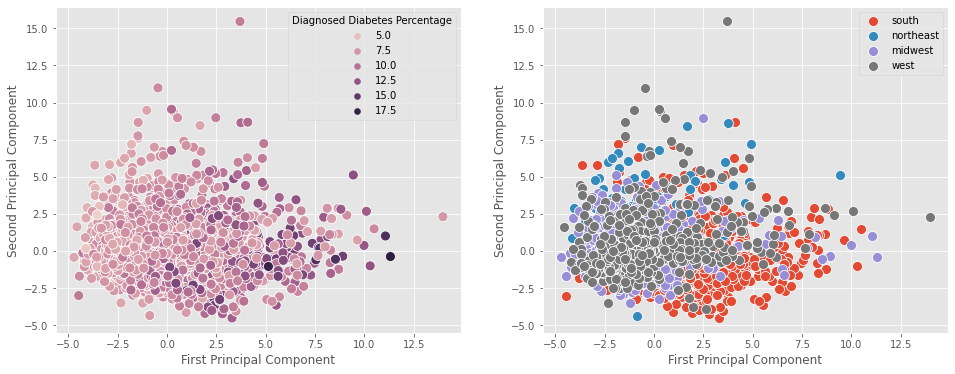

In [105]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=reduced[:,0],y=reduced[:,1],hue=fdf['Diagnosed Diabetes Percentage'],ax=ax[0],s=100)
ax[0].set_xlabel('First Principal Component')
ax[0].set_ylabel('Second Principal Component')

for col in ['in_south','in_northeast','in_midwest','in_west']:
    mask = fdf[col] == 1
    sns.scatterplot(x=reduced[mask,0],y=reduced[mask,1],label = col[3:],s=100)
ax[1].legend()

ax[1].set_xlabel('First Principal Component')
ax[1].set_ylabel('Second Principal Component')


In [100]:
pca.explained_variance_

array([5.68760618, 2.87856209, 2.60555619])

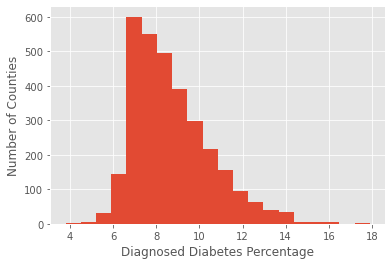

In [111]:
fig, ax = plt.subplots()
fdf['Diagnosed Diabetes Percentage'].hist(ax = ax,bins=20)
ax.set_xlabel('Diagnosed Diabetes Percentage')
ax.set_ylabel('Number of Counties')
#fig.savefig('figs/diabetes_hist.png')